## MALARIA DATASET

The malaria image dataset was collected from Kaggle. It was initially collected from the official National Institute of Health (NIH) Website ). The dataset was a zipped folder of 708MB, that contains 2 folders – Infected and Uninfected. Each of these folders has 13799 images and in total, 27, 558. Since the two folders had an equal number of images, there is no missingness in the dataset.

###### Data Exploration

Preparing the images in folders, Image size and maybe visualizations.

In [1]:
import warnings
warnings.filterwarnings('ignore') # to ignore any warning

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Setting path and image size for both image dataset

image_MalAffected = "images_cell//Parasitized//"
image_MalNotAffected = "images_cell//Uninfected//"
image_size = 64 # pixel size per dimension.

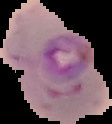

In [3]:
# Example image from the Affected cells
from PIL import Image  # PIL is in the pillow package (conda install -c anaconda pillow)
Image.open("images_cell//Parasitized//C39P4thinF_original_IMG_20150622_110115_cell_112.png")

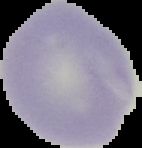

In [4]:
# Example image from the Affected cells
image_MalNotAffected 
Image.open("images_cell//Uninfected//C241NThinF_IMG_20151207_124608_cell_51.png")

## Preprocessing Data

Next stage is preprocessing the data

This includes how to list the file in a directory, then:
1. read the image,
2. resize it. 
3. and finally visuliase one of the images to see how it looks like.

In [5]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


100%|███████████████████████████████████████████████████████████████████████████| 13779/13779 [00:43<00:00, 314.42it/s]


Text(0.5, 1.0, 'Cells not affected by Malaria - Image')

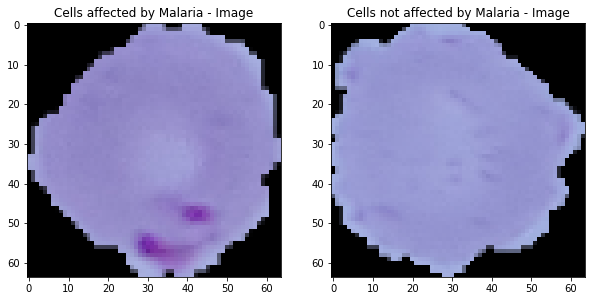

In [6]:
from tqdm import tqdm
import os  # used for IO operation like dealing with directories and files
import cv2  # this package for computer vision, install with (conda install -c anaconda opencv)

cell_images = []
labels = []

## NOTE:
## in case you have python 3.9, opencv needs to be installed with pip (since the installation command given above won't be supported by V3.9).
## but we need to be first sure if we have the latest version of pip:
# pip install --upgrade pip
## then install the opencv:
# pip install opencv-contrib-python

# import, resize training set images for class 'MalAffected':
for image in tqdm(os.listdir(image_MalAffected)): # listdir to list all files in that directory
    path = os.path.join(image_MalAffected, image)
    img = cv2.imread(path)  
    img = cv2.resize(img, (image_size, image_size))
    np_img=np.asarray(img) # convert it to numpy array for visualisations
    cell_images.append(np_img)
    labels.append(0)

# import and resize training set images for class 'MalNotAffected':
for image1 in tqdm(os.listdir(image_MalNotAffected)): 
    path1 = os.path.join(image_MalNotAffected, image1)
    # print(path1)
    img1 = cv2.imread(path1) 
    img1 = cv2.resize(img1, (image_size, image_size))
    np_img1=np.asarray(img1) # convert it to numpy array for visualisations
    cell_images.append(np_img1)
    labels.append(1)

# show an example of imported, resized images 
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img)
plt.axis('on')
plt.title("Cells affected by Malaria - Image")
plt.subplot(1, 2, 2)
plt.imshow(np_img1)
plt.axis('on')
plt.title("Cells not affected by Malaria - Image")

Wrapping the output around the iterable with the tqdm library creates a smart progress bar, that shows the time elapsed and also the estimated time for the iterable.

2 Image dataset - Malaria Affected and Not Malaria Affected are loaded into the cell_images altogether using the append command.

In [7]:
np_img.shape

(64, 64, 3)

Dimensions of Malaria affected cells

In [9]:
np_img1.shape

(64, 64, 3)

Dimensions of Malaria Not-affected cells

In [11]:
len(cell_images), len(labels)

(27558, 27558)

Total images and labels count 13779 + 13779 = 27558

In [12]:
print(type(cell_images))

<class 'list'>


In [13]:
images = np.asarray(cell_images)
images.shape

(27558, 64, 64, 3)

Converting Images into numpy array

In [14]:
print(type(images))

<class 'numpy.ndarray'>


In [15]:
labels = np.asarray(labels)
labels.shape

(27558,)

Converting Labels into numpy array

In [16]:
print(type(labels))

<class 'numpy.ndarray'>


## Splitting the data into Training and Testing

In [17]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


X_train, X_test, y_train, y_test = train_test_split(images, to_categorical(labels), test_size=0.2, random_state=14)

Train and Test set split up, 80:20, converting labels into categorical

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22046, 64, 64, 3)
(22046, 2)
(5512, 64, 64, 3)
(5512, 2)


In [19]:
print(y_train.shape)

(22046, 2)


## CNN

CNN Model Creation using 2 Convolutional Layers with filter 32 and compiled towards the end

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Model Creation - CNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Model Compilation
# epochs = 25 # >>> should be 25+ lr = 0.01 # learning rate
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
print("CNN Model Layers")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

## Training & Testing

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 25
callback = EarlyStopping(monitor='loss', patience=3)

seed = 14
np.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=[callback])


print(len(history.history['loss']))
print("Fit & Training for CNN Model")

Epoch 1/25
345/345 [==============================] - 121s 343ms/step - loss: 1.7381 - accuracy: 0.5459 - val_loss: 0.6715 - val_accuracy: 0.5853
Epoch 2/25
345/345 [==============================] - 115s 334ms/step - loss: 0.6668 - accuracy: 0.5988 - val_loss: 0.6522 - val_accuracy: 0.6232
Epoch 3/25
345/345 [==============================] - 122s 354ms/step - loss: 0.6512 - accuracy: 0.6260 - val_loss: 0.6429 - val_accuracy: 0.6201
Epoch 4/25
345/345 [==============================] - 123s 355ms/step - loss: 0.4664 - accuracy: 0.7797 - val_loss: 0.2237 - val_accuracy: 0.9256
Epoch 5/25
345/345 [==============================] - 129s 375ms/step - loss: 0.2271 - accuracy: 0.9199 - val_loss: 0.1794 - val_accuracy: 0.9430
Epoch 6/25
345/345 [==============================] - 114s 332ms/step - loss: 0.1979 - accuracy: 0.9318 - val_loss: 0.1848 - val_accuracy: 0.9419
Epoch 7/25
345/345 [==============================] - 110s 318ms/step - loss: 0.1791 - accuracy: 0.9400 - val_loss: 0.1710 -

Epoch, Loss and Accuracy for CNN Model

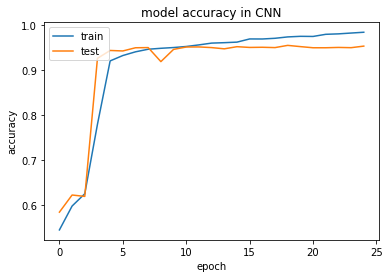

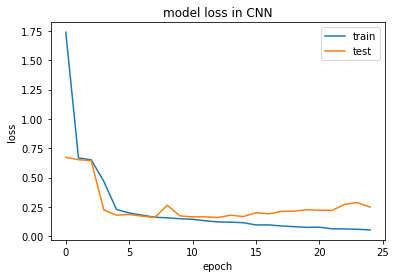

In [22]:
import matplotlib.pyplot as plt
# summarize history for accuracy


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy in CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss in CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Plot for Model Accuracy and Loss : CNN Model

## Report

In [23]:
from sklearn.metrics import classification_report

preds = model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = preds.argmax(axis=1)
print(preds.shape)
y_true = y_test.argmax(axis=1)
print(y_test.shape)
print(classification_report(y_true, preds))
print("Evaluation for CNN Model")

173/173 [==============================] - 6s 35ms/step
(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2761
           1       0.94      0.97      0.95      2751

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512

Evaluation for CNN Model


173/173 [==============================] - 6s 32ms/step


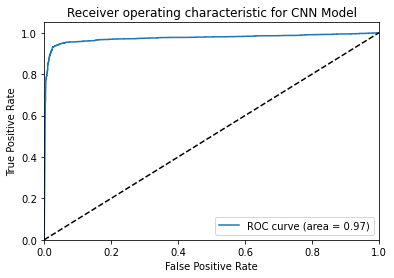

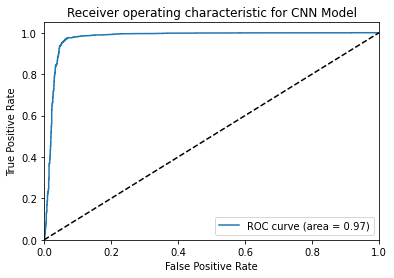

In [24]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for CNN Model')
    plt.legend(loc="lower right")
    plt.show()

Plot for ROC Curve Area:0.97 -:- CNN Model

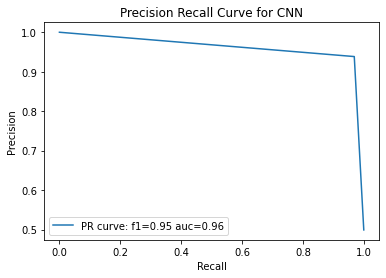

In [25]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

prec, rec , _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(rec, prec)

# plot the precision-recall curves
plt.plot(rec, prec, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for CNN')
# show the legend
plt.legend()
# show the plot
plt.show()

Plot for PR Curve Area:0.96 -:- CNN Model

## RESNET50

In [26]:
from keras.applications import resnet

resnet_model=resnet.ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))


Setting the first pre-trained value, Resnet50

In [27]:
resnet_model.trainable = False

# As no retraining is required and only the pretrained weights be utilised instead.

In [28]:
# Model Creation for ResNEt50
model = Sequential()
model.add(resnet_model)

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile model
# epochs = 25 # >>> should be 25+ lr = 0.01 # learning rate
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
print("ResNet50 Model Layers")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)              

In [29]:
epochs = 5
callback = EarlyStopping(monitor='loss', patience=3)

seed = 14
np.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=[callback])


print(len(history.history['loss']))
print("Fit & Training for ResNet50 Model")

Epoch 1/5
345/345 [==============================] - 355s 1s/step - loss: 0.5487 - accuracy: 0.8346 - val_loss: 0.2811 - val_accuracy: 0.8779
Epoch 2/5
345/345 [==============================] - 316s 917ms/step - loss: 0.2688 - accuracy: 0.8932 - val_loss: 0.2378 - val_accuracy: 0.9048
Epoch 3/5
345/345 [==============================] - 303s 878ms/step - loss: 0.2481 - accuracy: 0.9009 - val_loss: 0.2427 - val_accuracy: 0.9064
Epoch 4/5
345/345 [==============================] - 295s 856ms/step - loss: 0.2325 - accuracy: 0.9068 - val_loss: 0.2280 - val_accuracy: 0.9048
Epoch 5/5
345/345 [==============================] - 315s 914ms/step - loss: 0.2145 - accuracy: 0.9143 - val_loss: 0.2426 - val_accuracy: 0.8993
5
Fit & Training for ResNet50 Model


Epoch, Loss and Accuracy for ResNet50 Model

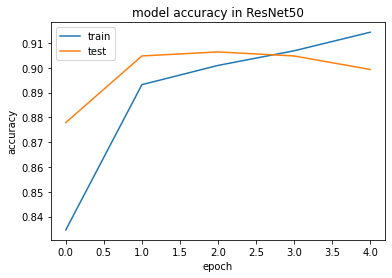

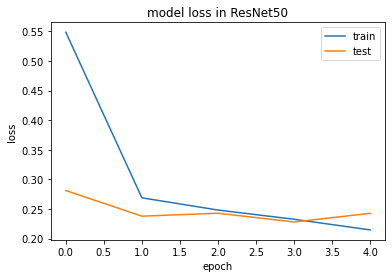

In [30]:
import matplotlib.pyplot as plt
# summarize history for accuracy


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy in ResNet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss in ResNet50')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Plot for Model Accuracy and Loss : ResNet50 Model

In [31]:
from sklearn.metrics import classification_report

preds = model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = preds.argmax(axis=1)
print(preds.shape)
y_true = y_test.argmax(axis=1)
print(y_test.shape)
print(classification_report(y_true, preds))
print("Evaluation for ResNet50 Model")

173/173 [==============================] - 70s 383ms/step
(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2761
           1       0.92      0.87      0.90      2751

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512

Evaluation for ResNet50 Model


173/173 [==============================] - 67s 387ms/step


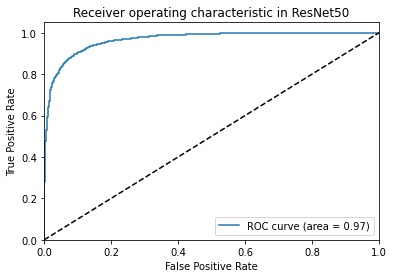

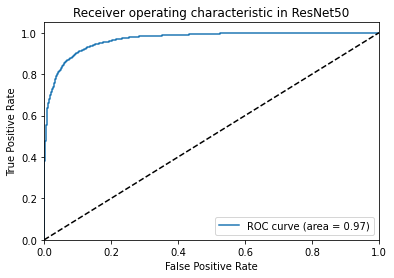

In [32]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic in ResNet50')
    plt.legend(loc="lower right")
    plt.show()

Plot for ROC Curve Area:0.97 -:- ResNet50 Model

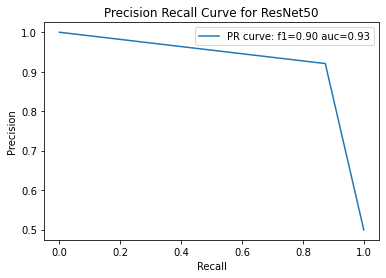

In [33]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall , _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for ResNet50')
# show the legend
plt.legend()
# show the plot
plt.show()

Plot for PR Curve Area:0.93 -:- ResNet50 Model

## VGG16

In [34]:

from keras.applications.vgg16 import VGG16


vgg16_model = tf.keras.applications.VGG16(weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    include_top=False)

In [62]:
vgg16_model.trainable = False
# As no retraining is required and only the pretrained weights be utilised instead.

In [36]:
# VGG16 Model Creation
model = Sequential()
model.add(vgg16_model)

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile model
# epochs = 25 # >>> should be 25+ lr = 0.01 # learning rate
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
print("VGG16 Model Layers")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)              

In [37]:
epochs = 5
callback = EarlyStopping(monitor='loss', patience=3)

seed = 14
np.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=[callback])
 

print(len(history.history['loss']))
print("Fit & Training for VGG16 Model")

Epoch 1/5
345/345 [==============================] - 681s 2s/step - loss: 0.3302 - accuracy: 0.8973 - val_loss: 0.1772 - val_accuracy: 0.9325
Epoch 2/5
345/345 [==============================] - 719s 2s/step - loss: 0.1843 - accuracy: 0.9351 - val_loss: 0.1696 - val_accuracy: 0.9360
Epoch 3/5
345/345 [==============================] - 692s 2s/step - loss: 0.1606 - accuracy: 0.9436 - val_loss: 0.1655 - val_accuracy: 0.9392
Epoch 4/5
345/345 [==============================] - 667s 2s/step - loss: 0.1525 - accuracy: 0.9450 - val_loss: 0.1588 - val_accuracy: 0.9425
Epoch 5/5
345/345 [==============================] - 679s 2s/step - loss: 0.1353 - accuracy: 0.9516 - val_loss: 0.1708 - val_accuracy: 0.9401
5
Fit & Training for VGG16 Model


Epoch, Loss and Accuracy for VGG16 Model

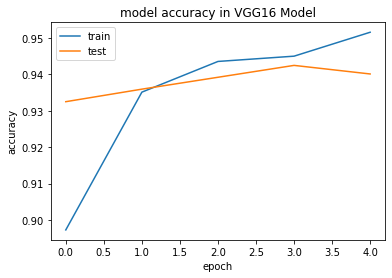

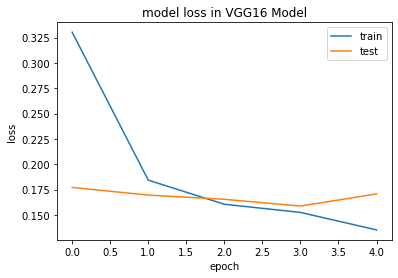

In [38]:
import matplotlib.pyplot as plt
# summarize history for accuracy


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy in VGG16 Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss in VGG16 Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [39]:
from sklearn.metrics import classification_report

preds = model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = preds.argmax(axis=1)
print(preds.shape)
y_true = y_test.argmax(axis=1)
print(y_test.shape)

print("Evaluation for VGG16 Model")
print(classification_report(y_true, preds))

173/173 [==============================] - 164s 944ms/step
(5512, 2)
(5512,)
(5512, 2)
Evaluation for VGG16 Model
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2761
           1       0.93      0.95      0.94      2751

    accuracy                           0.94      5512
   macro avg       0.94      0.94      0.94      5512
weighted avg       0.94      0.94      0.94      5512



173/173 [==============================] - 176s 1s/step


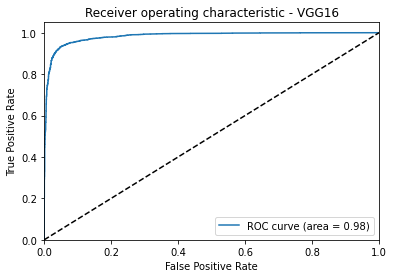

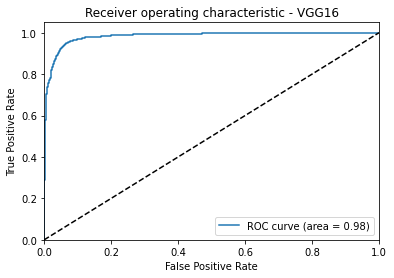

In [40]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic - VGG16')
    plt.legend(loc="lower right")
    plt.show()

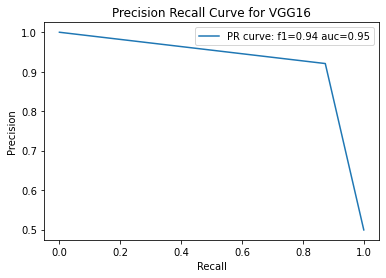

In [41]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

prec, rec , _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(rec, prec)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for VGG16')
# show the legend
plt.legend()
# show the plot
plt.show()

###### Fine Tuning

In [42]:
import keras_tuner as kt
from tensorflow import keras

As CNN performed better than the other two models, fine tuning of this model over ResNEt50 and VGG16 was done.

Filters of values 8, 16 and 32 were given to find the better fit for CNN

In [53]:
def build_model(hp):
    # Create the model
    model = Sequential()
    model.add(Conv2D(hp.Choice('filters', [8, 16, 32]), kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    

Tuner was set with hyperband with required parameters like model, epoch and overwrite factors.

In [54]:
tuner = kt.Hyperband(build_model, objective ='val_accuracy',factor = 3, overwrite = True, max_epochs = 9)

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

call = EarlyStopping(monitor='loss', patience = 4)

Early Stopping function used to stop the epoch before it reaches a max value, in order to prevent over fitting.

Tuner search is used with the test values and call back and a hyper parameter is set to find the best Accuracy by repeated trials

In [56]:

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks = [call])
best_model = tuner.get_best_hyperparameters(num_trials = 3)[0]

print("Finding the best Val_Accuracy using trials")

Trial 3 Complete [00h 01m 00s]
val_accuracy: 0.7039186954498291

Best val_accuracy So Far: 0.8900580406188965
Total elapsed time: 00h 04m 03s
INFO:tensorflow:Oracle triggered exit
Finding the best Val_Accuracy using trials


In [57]:
tuned_model = tuner.hypermodel.build(best_model)
tuned_history = tuned_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size=64, callbacks=[call])

print("Fit & Training for CNN TUNED Model")

Epoch 1/12
345/345 [==============================] - 93s 264ms/step - loss: 1.6758 - accuracy: 0.5245 - val_loss: 0.6814 - val_accuracy: 0.5737
Epoch 2/12
345/345 [==============================] - 82s 237ms/step - loss: 0.6791 - accuracy: 0.5668 - val_loss: 0.6719 - val_accuracy: 0.6081
Epoch 3/12
345/345 [==============================] - 81s 235ms/step - loss: 0.6671 - accuracy: 0.6015 - val_loss: 0.6564 - val_accuracy: 0.6183
Epoch 4/12
345/345 [==============================] - 83s 240ms/step - loss: 0.3914 - accuracy: 0.8426 - val_loss: 0.2041 - val_accuracy: 0.9432
Epoch 5/12
345/345 [==============================] - 82s 236ms/step - loss: 0.2188 - accuracy: 0.9307 - val_loss: 0.1812 - val_accuracy: 0.9501
Epoch 6/12
345/345 [==============================] - 82s 237ms/step - loss: 0.1882 - accuracy: 0.9409 - val_loss: 0.1634 - val_accuracy: 0.9539
Epoch 7/12
345/345 [==============================] - 82s 237ms/step - loss: 0.1765 - accuracy: 0.9421 - val_loss: 0.1542 - val_ac

Epoch, Loss and Accuracy for CNN Tuned Model

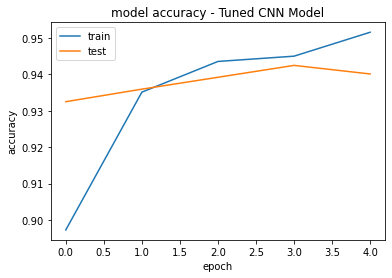

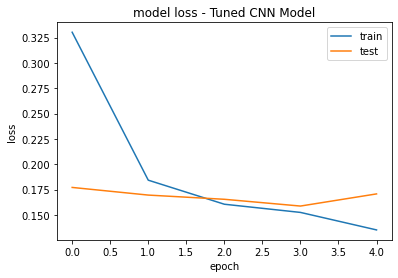

In [58]:
import matplotlib.pyplot as plt
# summarize history for accuracy


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy - Tuned CNN Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss - Tuned CNN Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

173/173 [==============================] - 139s 801ms/step


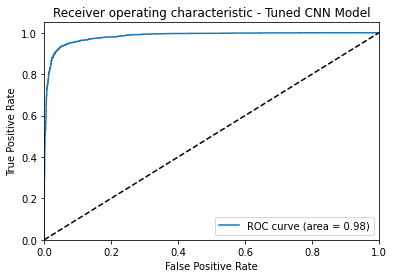

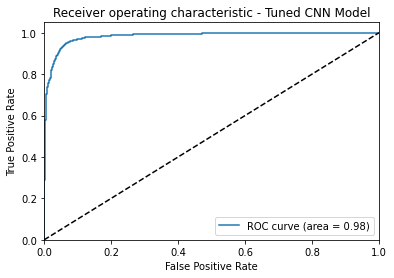

In [59]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic - Tuned CNN Model')
    plt.legend(loc="lower right")
    plt.show()

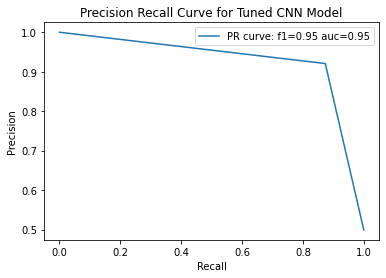

In [60]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

prec, rec , _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(rec, prec)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Tuned CNN Model')
# show the legend
plt.legend()
# show the plot
plt.show()

In [61]:
from sklearn.metrics import classification_report

preds = tuned_model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = preds.argmax(axis=1)
print(preds.shape)
y_true = y_test.argmax(axis=1)
print(y_test.shape)

print("Evaluation for Tuned CNN Model")
print(classification_report(y_true, preds))

173/173 [==============================] - 5s 29ms/step
(5512, 2)
(5512,)
(5512, 2)
Evaluation for Tuned CNN Model
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2761
           1       0.93      0.97      0.95      2751

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



Tuned CNN Accuracy has given the same Accuracy as CNN

!pip install keras-tuner --upgrade

tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)